1. Cargamos el dataset tips

In [ ]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset("tips")
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Variable respuesta: tip

Variables predictoras:
total_bill, size

2. Preparamos variables predictoras y respuesta

In [ ]:
import statsmodels.api as sm

X = data[["total_bill", "size"]]  # variables explicativas
y = data["tip"]                   # variable respuesta

X = sm.add_constant(X)            # agregamos intercepto


ahora la propina depende del monto de la cuenta y del tamaño de la mesa.

3. Ajustamos el modelo de regresión múltiple

In [ ]:
modelo = sm.OLS(y, X).fit()


Se esta buscando la mejor combinación lineal de estas variables para explicar la propina.

4. Visualizamos relaciones entre variables

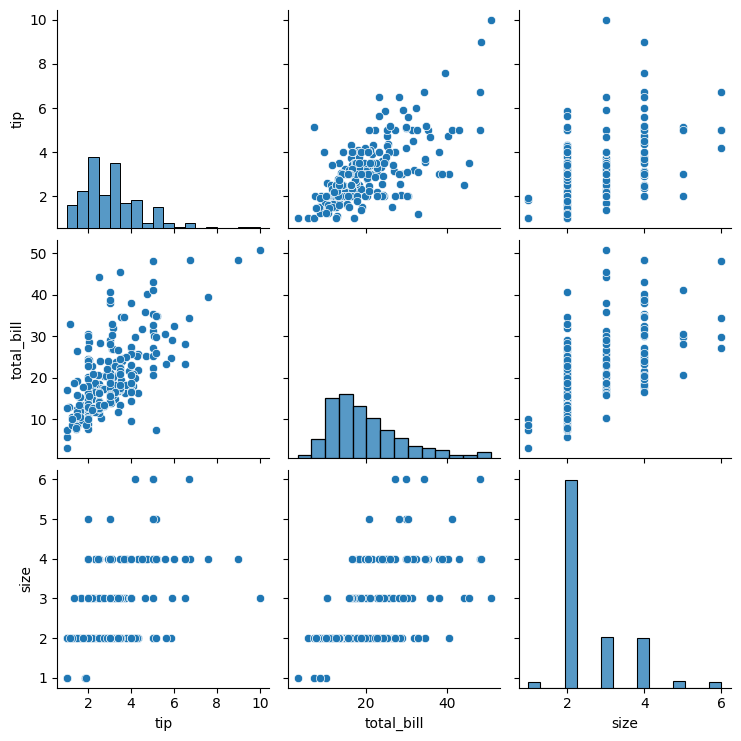

In [ ]:
sns.pairplot(data[["tip", "total_bill", "size"]])


ver relaciones aproximadas

entender dispersión

anticipar qué variables explican más

5. Calculamos métricas de evaluación

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = modelo.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


MAE: 0.739
MSE: 1.015
RMSE: 1.007
R²: 0.468


MAE / RMSE → cuánto se equivoca el modelo

R² → cuánto logra explicar

6. Interpretamos los coeficientes

MAE = 0.739

En promedio, el modelo se equivoca en unos 0.74 dólares de propina.
Es una buena referencia “realista” del error típico, sin castigar demasiado los casos extremos.

MSE = 1.015

Es el error promedio, pero elevando las diferencias al cuadrado.
No se interpreta directamente en dólares, sino que sirve para penalizar errores grandes y comparar modelos entre sí.

RMSE = 1.007

El error típico ronda 1 dólar.
Como el RMSE es mayor que el MAE, nos dice que existen algunas predicciones que se equivocan más que el promedio.

R² = 0.468

El modelo explica cerca del 47% de la variabilidad de las propinas.
Eso significa que el tamaño de la cuenta y la cantidad de personas ayudan a explicar la propina, pero no alcanzan para explicarla completamente.

7. Predicción con datos nuevos

In [ ]:
nuevo = pd.DataFrame({
    "const": [1],
    "total_bill": [40],
    "size": [4]
})

prediccion = modelo.predict(nuevo)
prediccion


,0
0,5.147869


8. Resumen estadístico del modelo

In [ ]:
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           9.67e-34
Time:                        13:00:32   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

Es un modelo de regresión lineal múltiple donde intentamos explicar la propina (tip) usando:

el total de la cuenta (total_bill)

el tamaño de la mesa (size)

La ecuación del modelo:

tip=
0.67
+
0.093
⋅
total_bill
+
0.193
⋅
size
tip=0.67+0.093⋅total_bill+0.193⋅size



- Existe una propina base promedio cercana a 0.67, incluso en cuentas pequeñas.
- Por cada dólar adicional en la cuenta, la propina aumenta en promedio 9 centavos, manteniendo fijo el número de personas.
- Cada persona adicional en la mesa aumenta la propina promedio en casi 0.20 dólares, manteniendo fijo el monto de la cuenta.

¿Son significativos estos efectos?

Sí, ambos:

- total_bill: p-value = 0.000 → muy significativo
- size: p-value = 0.025 → significativo

Resumen: ambas variables aportan información real al modelo

¿Qué tan bien explica el modelo?

R² = 0.468

R² ajustado = 0.463

Esto significa:
- el modelo explica cerca del 47% de la variación de las propinas
- el segundo predictor (size) aporta algo, pero no cambia radicalmente la capacidad explicativa

Conclusiones:

* Al incluir el tamaño de la mesa, el modelo logra explicar un poco mejor las propinas y separar el efecto del monto del efecto de cuántas personas están pagando.

* Dos mesas pueden pagar lo mismo, pero dejar propinas distintas si el número de personas cambia.